In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

/localscratch/2195076/ipykernel_1428945/1872421135.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
Matplotlib created a temporary cache directory at /localscratch/2195076/matplotlib-wwpp7uk7 because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [11]:
data = pd.read_csv('/home/mautushid/Cowsformer/table.csv')

In [12]:
data_out = data
data_out = data_out.drop('iteration', axis=1)

In [13]:
data_out

,map5095,map50,precision,recall,f1,n_all,n_fn,n_fp,config,model,n
0,0.085786,0.150644,0.239067,0.115656,0.155894,709,627,261,1a_angle_t2s,yolo_nas_l,32
1,0.130981,0.245924,0.371336,0.160790,0.224409,709,595,193,1a_angle_t2s,yolo_nas_l,32
2,0.084693,0.168615,0.276265,0.100141,0.146998,709,638,186,1a_angle_t2s,yolo_nas_l,32
3,0.288542,0.450885,0.655870,0.228491,0.338912,709,547,85,1a_angle_t2s,yolo_nas_l,64
4,0.130100,0.214305,0.371041,0.119708,0.181015,685,603,139,1a_angle_t2s,yolo_nas_l,64
...,...,...,...,...,...,...,...,...,...,...,...
192,0.258444,0.475294,0.583450,0.581818,0.582633,2860,1196,1188,4_all,yolo_nas_s,256
193,0.246732,0.463494,0.563039,0.593357,0.577800,2860,1163,1317,4_all,yolo_nas_s,256
194,0.243864,0.464941,0.582781,0.584615,0.583697,2860,1188,1197,4_all,yolo_nas_s,256
195,0.262027,0.475013,0.574062,0.609790,0.591387,2860,1116,1294,4_all,yolo_nas_s,500


In [14]:
# count each cateogory (config,model,n)
data_out.groupby(["config", "model", "n"]).aggregate(["count"]).reset_index()

,config,model,n,map5095,map50,precision,recall,f1,n_all,n_fn,n_fp
,,,,count,count,count,count,count,count,count,count
0,1a_angle_t2s,yolo_nas_l,32,3,3,3,3,3,3,3,3
1,1a_angle_t2s,yolo_nas_l,64,3,3,3,3,3,3,3,3
2,1a_angle_t2s,yolo_nas_l,128,3,3,3,3,3,3,3,3
3,1a_angle_t2s,yolo_nas_l,256,2,2,2,2,2,2,2,2
4,1a_angle_t2s,yolo_nas_l,500,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
67,4_all,yolo_nas_s,32,3,3,3,3,3,3,3,3
68,4_all,yolo_nas_s,64,3,3,3,3,3,3,3,3
69,4_all,yolo_nas_s,128,3,3,3,3,3,3,3,3


In [15]:
data_out.groupby(["config", "model", "n"]).aggregate(["count"]).reset_index()

,config,model,n,map5095,map50,precision,recall,f1,n_all,n_fn,n_fp
,,,,count,count,count,count,count,count,count,count
0,1a_angle_t2s,yolo_nas_l,32,3,3,3,3,3,3,3,3
1,1a_angle_t2s,yolo_nas_l,64,3,3,3,3,3,3,3,3
2,1a_angle_t2s,yolo_nas_l,128,3,3,3,3,3,3,3,3
3,1a_angle_t2s,yolo_nas_l,256,2,2,2,2,2,2,2,2
4,1a_angle_t2s,yolo_nas_l,500,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
67,4_all,yolo_nas_s,32,3,3,3,3,3,3,3,3
68,4_all,yolo_nas_s,64,3,3,3,3,3,3,3,3
69,4_all,yolo_nas_s,128,3,3,3,3,3,3,3,3


In [16]:
p = 5 * 3 * 5 # n size x models x datasets
print("number of iterations in NAS: %.2f" % (len(data_out) / p))


number of iterations in NAS: 2.63


<Axes: xlabel='n', ylabel='map50'>

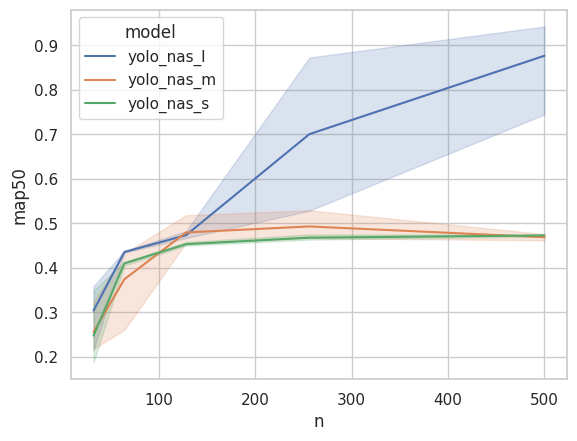

In [17]:
# config: 1a_angle_t2s, 1b_angle_s2t, 2_light
sns.lineplot(data=data_out.query("config == '4_all'"), x="n", y="map50", hue="model",)

<Axes: xlabel='n', ylabel='map50'>

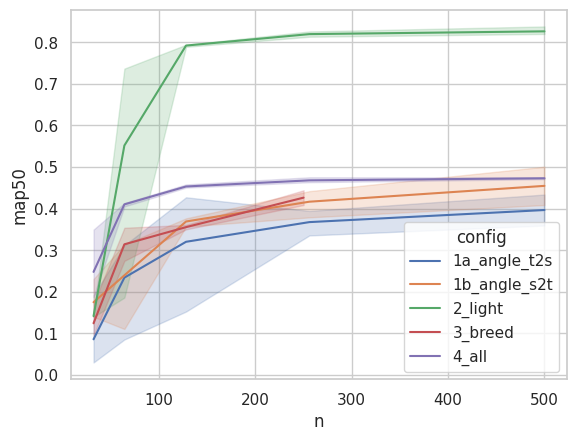

In [18]:
# config: 1a_angle_t2s, 1b_angle_s2t, 2_light
sns.lineplot(data=data_out.query("model == 'yolo_nas_s'"), x="n", y="map50", hue="config",)

In [19]:
#data_out.to_csv("out_0304.csv", index=False)

In [20]:
data_long = data_out.melt(id_vars=["model", "config", "n"], 
                      var_name="metric", 
                      value_name="value",)
data_long

,model,config,n,metric,value
0,yolo_nas_l,1a_angle_t2s,32,map5095,0.085786
1,yolo_nas_l,1a_angle_t2s,32,map5095,0.130981
2,yolo_nas_l,1a_angle_t2s,32,map5095,0.084693
3,yolo_nas_l,1a_angle_t2s,64,map5095,0.288542
4,yolo_nas_l,1a_angle_t2s,64,map5095,0.130100
...,...,...,...,...,...
1571,yolo_nas_s,4_all,256,n_fp,1188.000000
1572,yolo_nas_s,4_all,256,n_fp,1317.000000
1573,yolo_nas_s,4_all,256,n_fp,1197.000000
1574,yolo_nas_s,4_all,500,n_fp,1294.000000


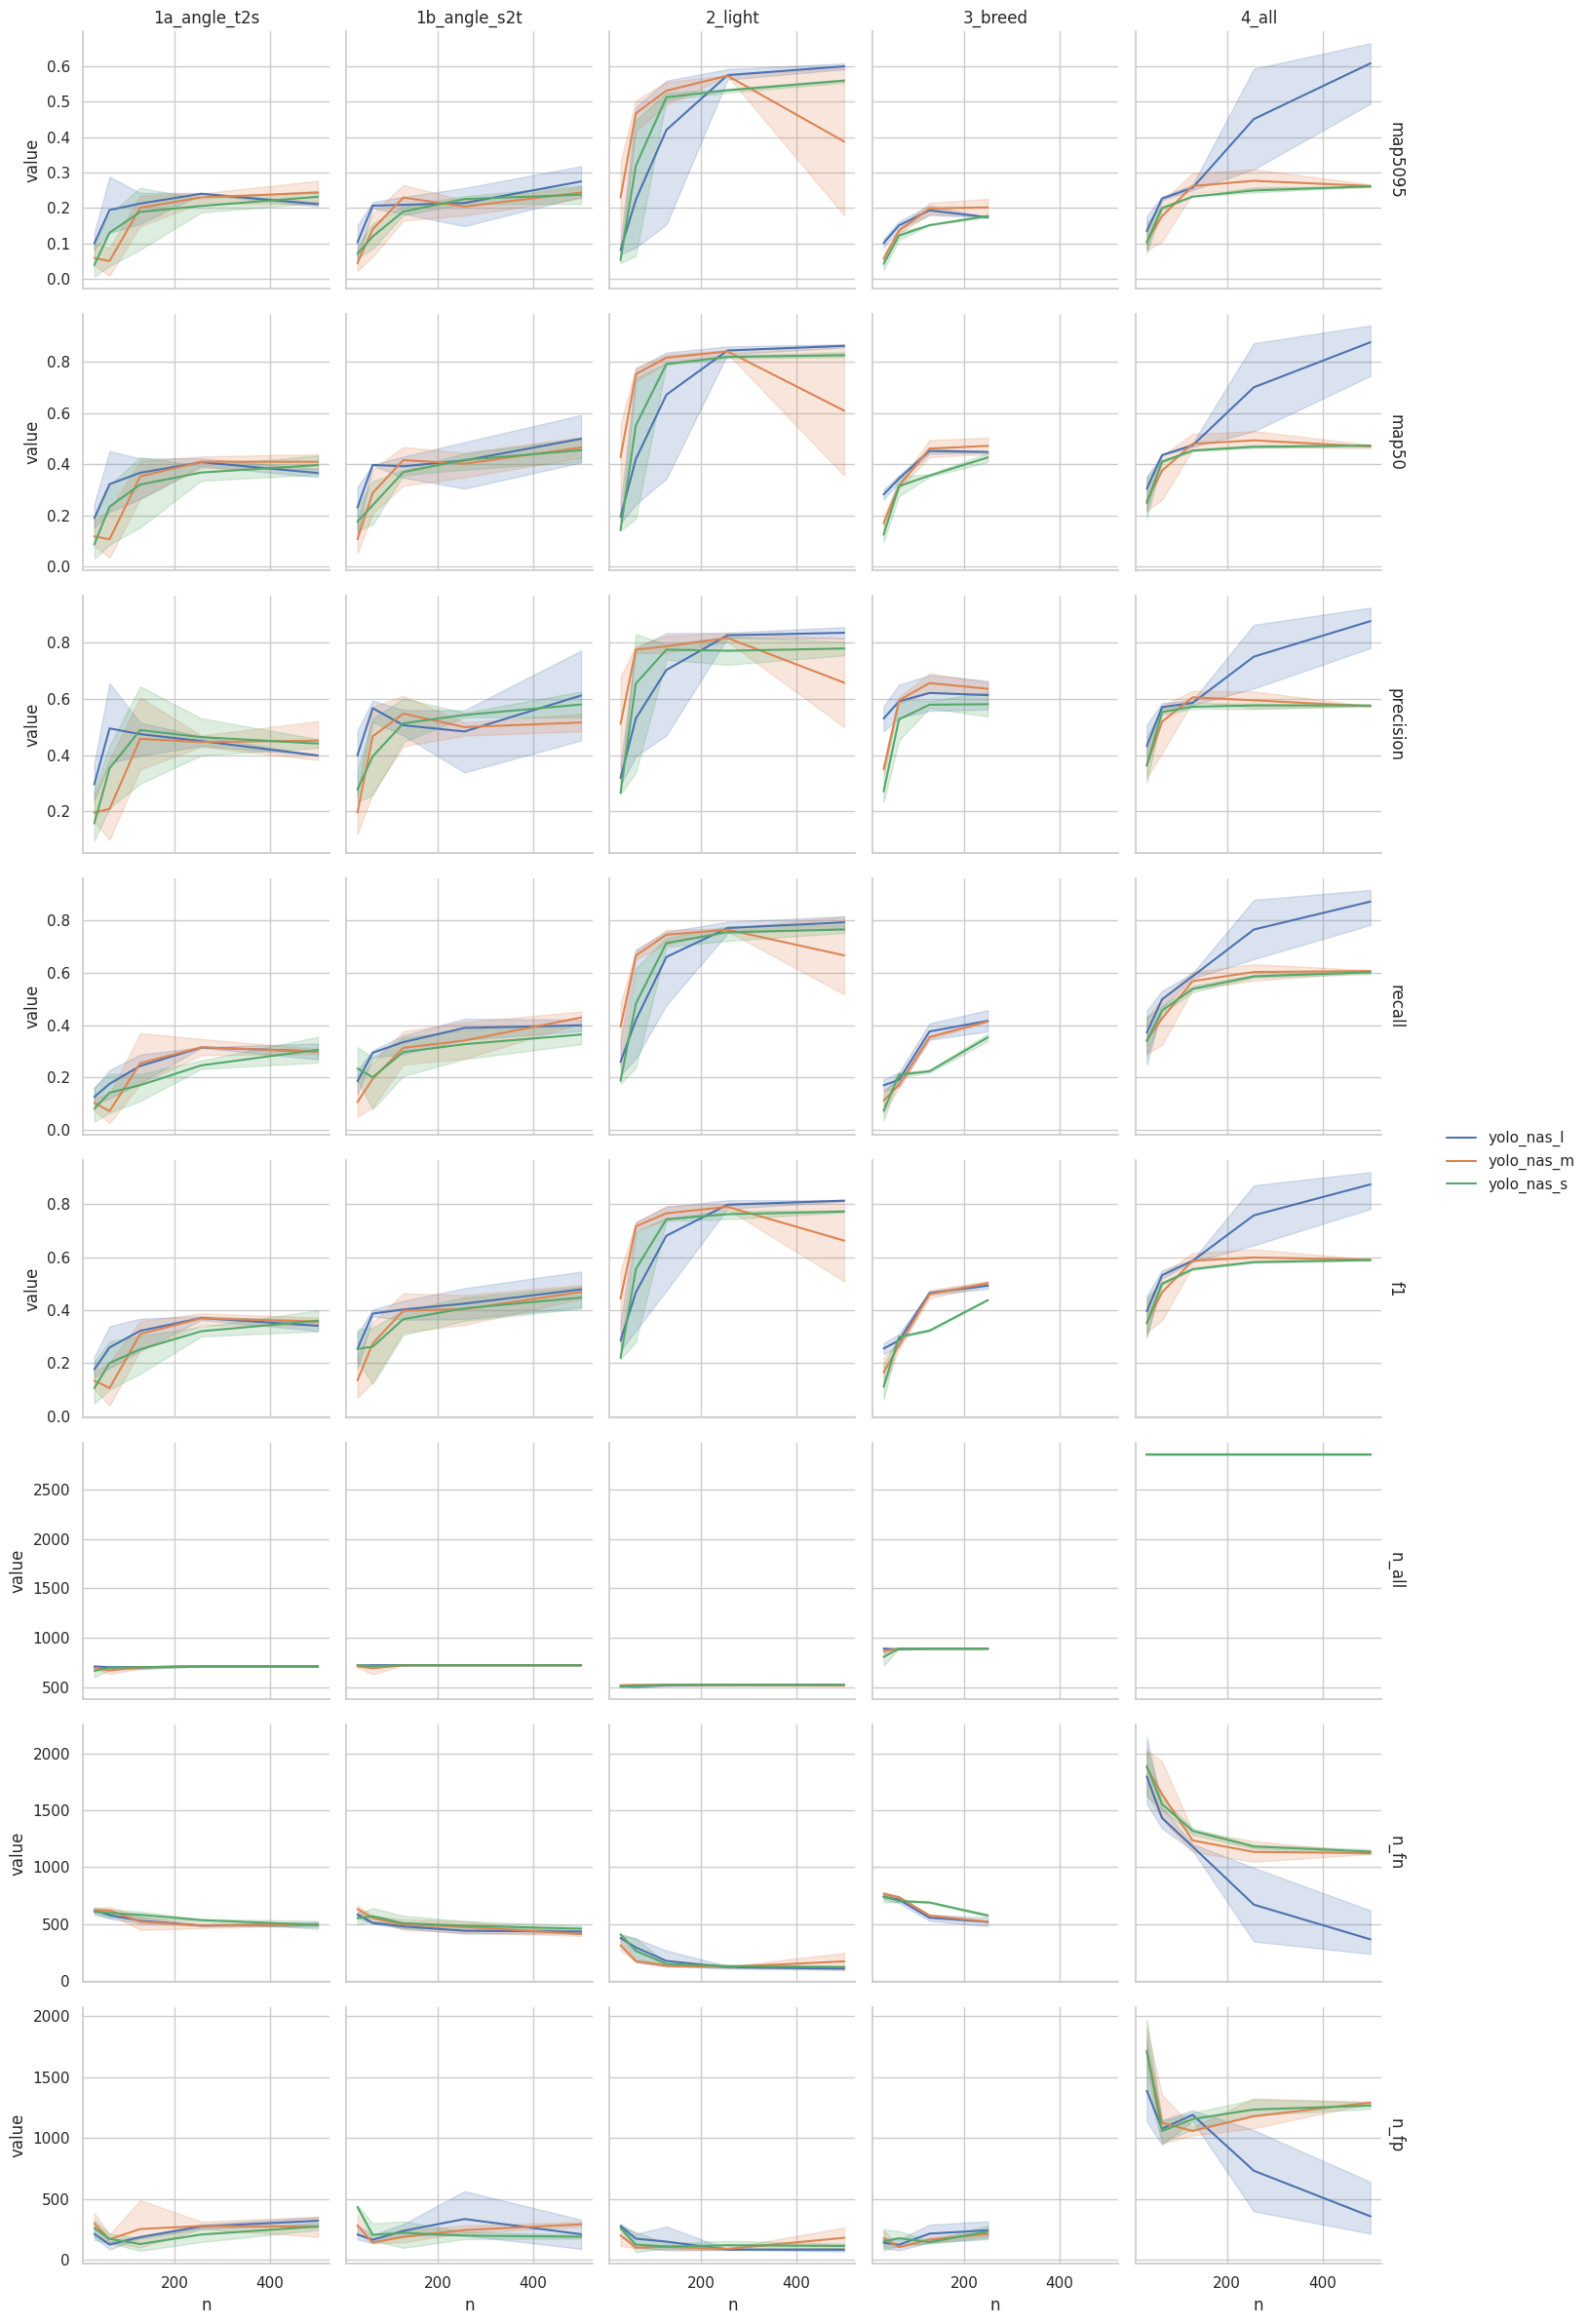

In [21]:
# x is n
# y is map50
# hue is model
# facet is config
sns.set(style="whitegrid")
g = sns.FacetGrid(data_long,
                  col="config",
                  row="metric",
                  margin_titles=True,
                  sharey='row',)
g.map(sns.lineplot, "n", "value", "model")
# g.set_axis_labels("n", "map50")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend()
plt.show()